### Step 1 : Problem Statement

In [70]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve,roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Step 2 : Data Collection

In [71]:
# read the data
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Step 3 : EDA (Exploratory Data Analysis)

In [72]:
# Read the dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Remove leading/trailing spaces from column names and string values
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
df.shape # Returns a tuple representing the dimensions of the DataFrame: (number of rows, number of columns)

(4269, 13)

In [74]:
df.info() # Displays a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [75]:
df.isna().sum() # Finding missing values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [76]:
df.describe() # Generates descriptive statistics for numerical columns:

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [77]:
df_1 = df.copy() # created copy of original df

In [78]:
df_1.nunique() # Returns the number of unique values in each column of the DataFrame

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [79]:
# Creates a summary DataFrame containing key information about each column in df_1:
summary = pd.DataFrame({"columns": df_1.columns,
                       "Data Type": df_1.dtypes.values,
                       "Missing values per":df_1.isna().mean()*100,
                       "Unique values": df_1.nunique().values})
summary

,columns,Data Type,Missing values per,Unique values
loan_id,loan_id,int64,0.0,4269
no_of_dependents,no_of_dependents,int64,0.0,6
education,education,object,0.0,2
self_employed,self_employed,object,0.0,2
income_annum,income_annum,int64,0.0,98
loan_amount,loan_amount,int64,0.0,378
loan_term,loan_term,int64,0.0,10
cibil_score,cibil_score,int64,0.0,601
residential_assets_value,residential_assets_value,int64,0.0,278
commercial_assets_value,commercial_assets_value,int64,0.0,188


In [80]:
df.columns # Returns an Index object containing the column names of the DataFrame

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [81]:
for col in df_1.columns:  # checking anamolies 
    print(f"column {col} and unique values are {df_1[col].unique()}")
    print("*************************")

column loan_id and unique values are [   1    2    3 ... 4267 4268 4269]
*************************
column no_of_dependents and unique values are [2 0 3 5 4 1]
*************************
column education and unique values are ['Graduate' 'Not Graduate']
*************************
column self_employed and unique values are ['No' 'Yes']
*************************
column income_annum and unique values are [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 86000

<Axes: >

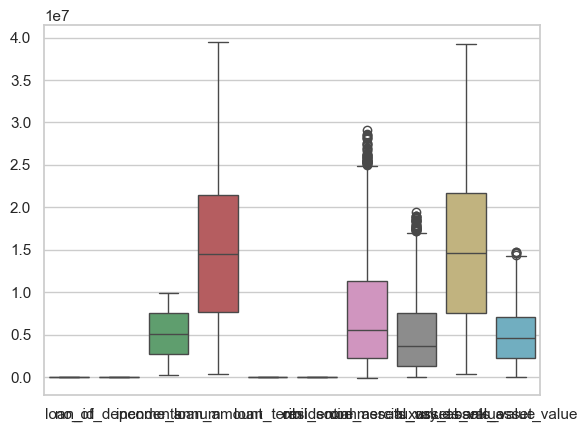

In [82]:
sns.boxplot(df_1) 

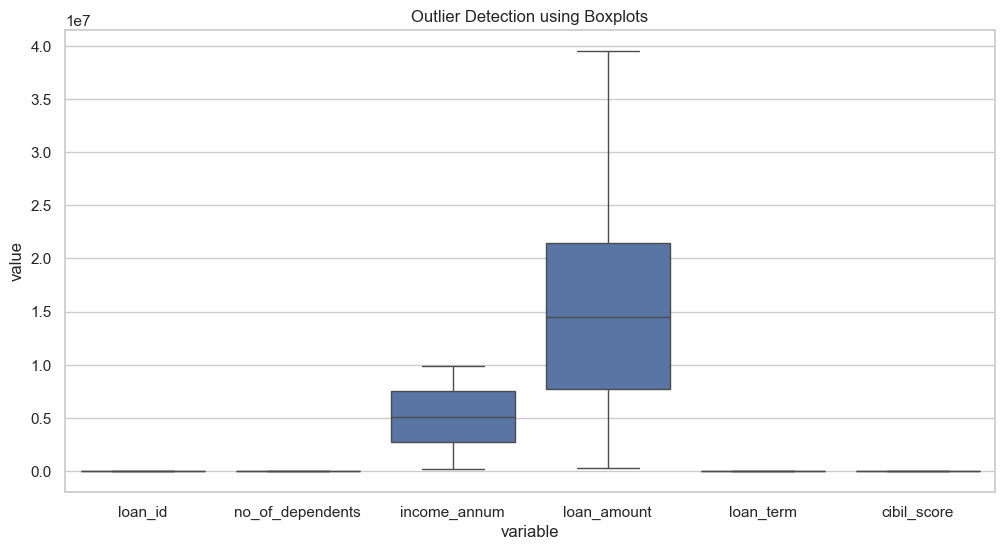

In [83]:
col_names = ['loan_id', 'no_of_dependents','income_annum', 'loan_amount', 'loan_term', 'cibil_score']
df_melted = df_1[col_names].melt()
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Outlier Detection using Boxplots")
plt.show()

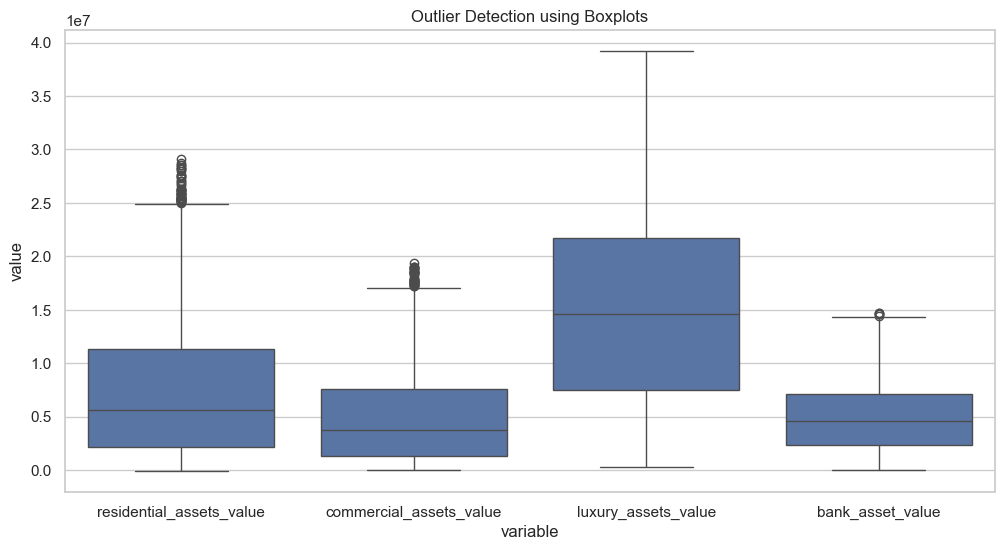

In [84]:
col_names = ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
df_melted = df_1[col_names].melt()
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Outlier Detection using Boxplots")
plt.show()

In [85]:
# Rows and Columns before outlier removal
df_1.shape

(4269, 13)

In [86]:
# Handling Outliers using IQR Method
def remove_outliers_iqr_all(df_1, cols):
    mask = pd.Series(True, index=df_1.index)
    for col in cols:
        Q1 = df_1[col].quantile(0.25)
        Q3 = df_1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (df_1[col] >= lower) & (df_1[col] <= upper)
    return df_1[mask]

df_1 = remove_outliers_iqr_all(df_1, [
    'residential_assets_value', 
    'commercial_assets_value', 
    'bank_asset_value'
])


In [87]:
# Rows and Columns after outlier removal
df_1.shape

(4178, 13)

In [88]:
# No of rows removed after outlier removal
4269 - 4178

91

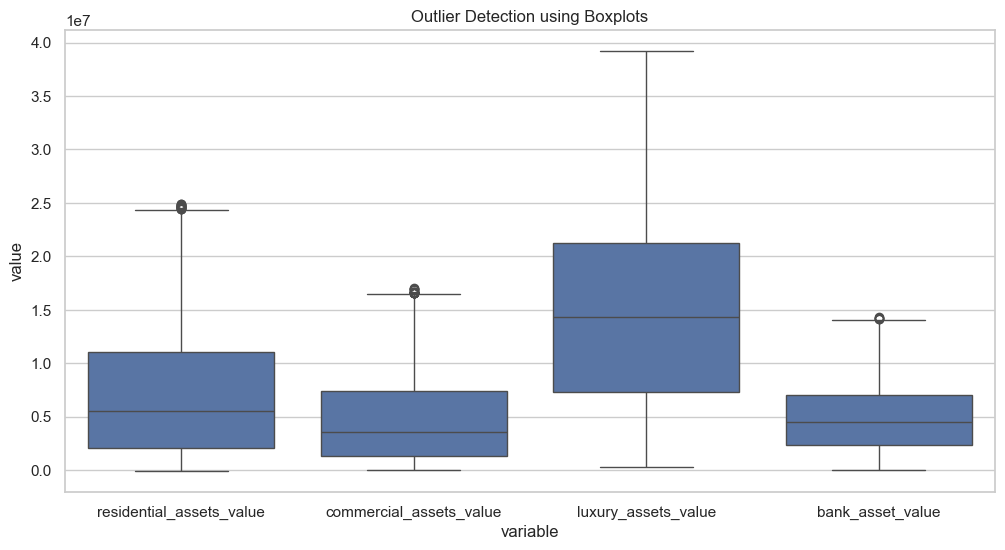

In [89]:
# Box plots after Outlier Removal
col_names = ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
df_melted = df_1[col_names].melt()
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Outlier Detection using Boxplots")
plt.show()

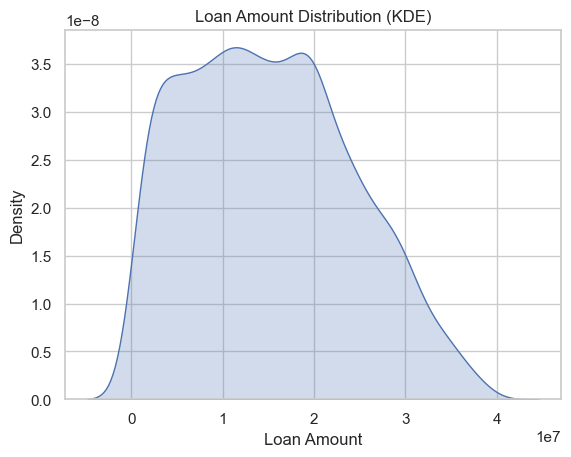

In [90]:
# For example, KDE plot for 'loan_amount'
sns.kdeplot(data=df, x='loan_amount', shade=True)
plt.title('Loan Amount Distribution (KDE)')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

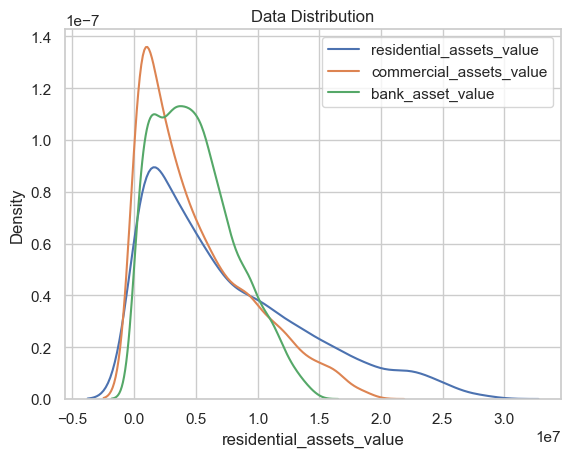

In [91]:
# Plots Kernel Density Estimates (KDE) to visualize the distribution of asset-related columns
sns.kdeplot(df['residential_assets_value'], label='residential_assets_value')
sns.kdeplot(df['commercial_assets_value'], label='commercial_assets_value')
sns.kdeplot(df['bank_asset_value'], label='bank_asset_value')	
plt.legend()
plt.title('Data Distribution')
plt.show()

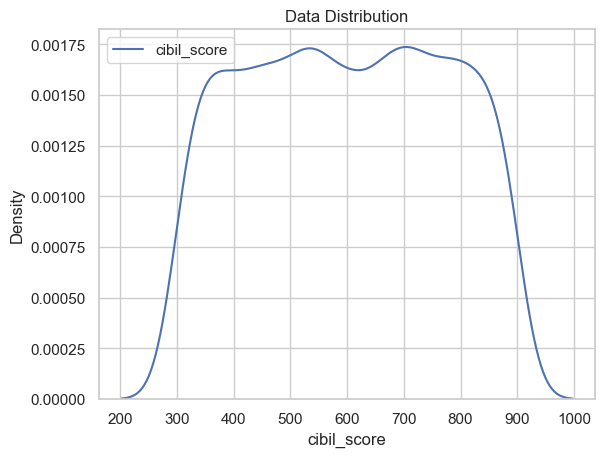

In [92]:
# Plots the Kernel Density Estimate (KDE) for the 'cibil_score' column
# This visualizes the distribution (shape and spread) of CIBIL scores in the dataset
sns.kdeplot(df['cibil_score'], label='cibil_score')
plt.legend()
plt.title('Data Distribution')
plt.show()

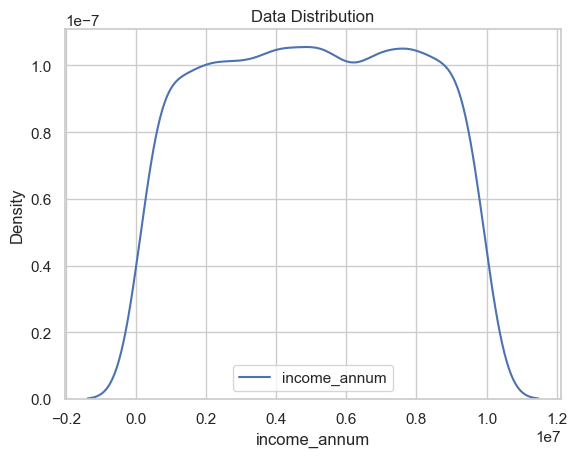

In [93]:
# Plots the Kernel Density Estimate (KDE) for the 'income_annum' column
# This helps visualize the probability distribution and spread of annual income values in the dataset
sns.kdeplot(df['income_annum'], label='income_annum')
plt.legend()
plt.title('Data Distribution')
plt.show()

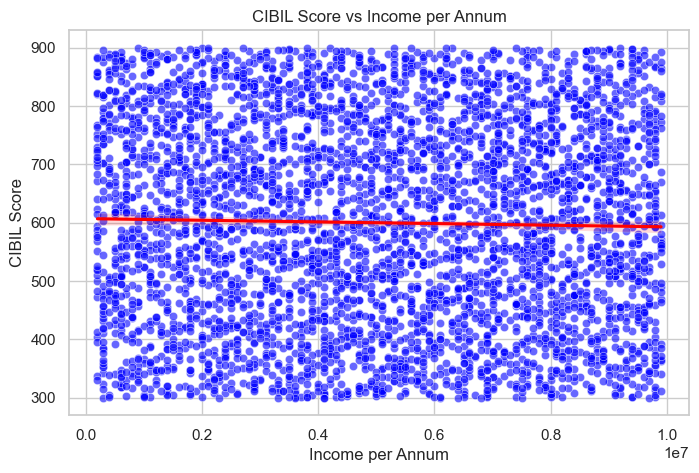

Pearson Correlation between CIBIL Score and Income per Annum: -0.023


In [94]:
# Clean column names
# Set up the style
sns.set(style="whitegrid")

# 1. CIBIL Score vs Income (Continuous vs Continuous)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='income_annum', y='cibil_score', alpha=0.6, color='blue')
sns.regplot(data=df, x='income_annum', y='cibil_score', scatter=False, color='red')  # Optional: regression line
plt.title("CIBIL Score vs Income per Annum")
plt.xlabel("Income per Annum")
plt.ylabel("CIBIL Score")
plt.show()

# Pearson Correlation
correlation = df[['cibil_score', 'income_annum']].corr().iloc[0, 1]
print(f"Pearson Correlation between CIBIL Score and Income per Annum: {correlation:.3f}")


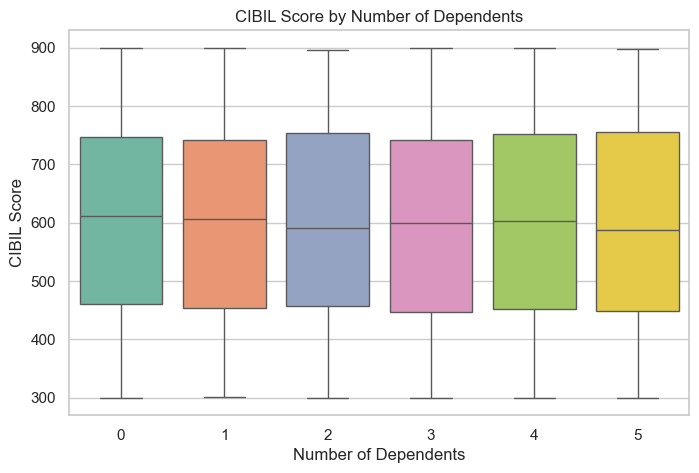

In [95]:
# 2. CIBIL Score vs Dependents (Continuous vs Categorical)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='no_of_dependents', y='cibil_score', palette="Set2")
plt.title("CIBIL Score by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("CIBIL Score")
plt.show()

In [96]:
df_1[df_1.duplicated()] # no duplicated row

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


### 4) Feature Engineering / Data Cleaning / Data Preparation

In [97]:
# loan_id, loan_status
df_1.drop(['loan_id'],axis=1,inplace=True)

In [98]:
df_1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


In [99]:
df_1.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [100]:
df_1["education"].value_counts().to_dict()

{'Graduate': 2108, 'Not Graduate': 2070}

In [101]:
df_1["self_employed"].value_counts().to_dict()

{'Yes': 2103, 'No': 2075}

In [102]:
df_1["loan_status"].value_counts().to_dict()

{'Approved': 2603, 'Rejected': 1575}

In [103]:
df_1["education"].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)
df_1["self_employed"].replace({'Yes': 1, 'No': 0},inplace = True)
df_1["loan_status"].replace({'Approved': 1, 'Rejected': 0},inplace = True)

In [104]:
df_1.loan_status.value_counts()

loan_status
1    2603
0    1575
Name: count, dtype: int64

### train test split

In [105]:
x = df_1.drop("loan_status",axis=1) # Independent variables
y = df_1["loan_status"] # Target variables
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3342, 11)
(836, 11)
(3342,)
(836,)


In [107]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

loan_status
1    2092
0    1250
Name: count, dtype: int64

loan_status
1    511
0    325
Name: count, dtype: int64


In [108]:
x = df_1.drop("loan_status",axis=1)
y = df_1["loan_status"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [109]:

# List of all columns to scale
numerical_cols = [
    'no_of_dependents', 'education', 'self_employed', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [110]:
x_train.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1582,-0.295287,-1.0,0.988102,0.12818,-0.283833,0.54868,-0.753485,0.4733,-0.767737,0.622428,-0.484804


In [111]:
x_test.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4128,1.475376,-1.0,0.988102,0.671254,0.890125,0.54868,-1.279235,1.721543,-0.983542,0.767287,0.295992


In [112]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

loan_status
1    2082
0    1260
Name: count, dtype: int64

loan_status
1    521
0    315
Name: count, dtype: int64


### Model_training

In [113]:
lg_model = LogisticRegression(class_weight='balanced' )
lg_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [114]:
lg_model.score(x_train,y_train),lg_model.score(x_test,y_test)

(0.9251944943147815, 0.9246411483253588)

In [115]:
y_pred = lg_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [116]:
# y_pred = lg_model.predict_proba(x_test)
# y_pred

In [117]:
y_pred = lg_model.predict_proba(x_test)
y_pred

array([[9.89839480e-01, 1.01605196e-02],
       [1.35879920e-04, 9.99864120e-01],
       [1.35124876e-01, 8.64875124e-01],
       ...,
       [3.51803478e-01, 6.48196522e-01],
       [4.83090158e-01, 5.16909842e-01],
       [5.89012762e-01, 4.10987238e-01]])

### Evaluation

In [118]:
# training side - Prediction

y_pred = lg_model.predict(x_train)
clf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion metrix is\n",clf_matrix)

print()
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is ",accuracy)
clf_report = classification_report(y_train,y_pred)
print("Classification report \n",clf_report)

Confusion metrix is
 [[1190   70]
 [ 180 1902]]

Accuracy is  0.9251944943147815
Classification report 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1260
           1       0.96      0.91      0.94      2082

    accuracy                           0.93      3342
   macro avg       0.92      0.93      0.92      3342
weighted avg       0.93      0.93      0.93      3342



In [119]:
# testing side -  Prediction
y_pred = lg_model.predict(x_test)
clf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion metrix is\n",clf_matrix)

print()
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)
clf_report = classification_report(y_test,y_pred)
print("Classification report \n",clf_report) 

Confusion metrix is
 [[303  12]
 [ 51 470]]

Accuracy is  0.9246411483253588
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       315
           1       0.98      0.90      0.94       521

    accuracy                           0.92       836
   macro avg       0.92      0.93      0.92       836
weighted avg       0.93      0.92      0.93       836



In [120]:
def con_matrix(train_y,y_pred) :
    ((TN,FP),(FN,TP))  = confusion_matrix(train_y,y_pred)
    ((tnr,fpr),(fnr,tpr)) = confusion_matrix(train_y,y_pred,normalize= "true")
    return pd.DataFrame([[f"TN = {TN}(TNR = {tnr})",
                        f"FP = {FP}(FPR = {fpr})"],
                        [f"FN = {FN}(FNR = {fnr})",
                        f"TP = {TP}(TPR = {tpr})"]],
                        index = ["Actual 0","Actual 1"],
                        columns = ["Pred 0","Pred 1"])

In [121]:
def con_matrix(train_y,y_pred) :
    ((TN,FP),(FN,TP))  = confusion_matrix(train_y,y_pred)
    ((tnr,fpr),(fnr,tpr)) = confusion_matrix(train_y,y_pred,normalize= "true")
    return pd.DataFrame([[f"TN = {TN}(TNR = {tnr:1.2%})",
                        f"FP = {FP}(FPR = {fpr:1.2%})"],
                        [f"FN = {FN}(FNR = {fnr:1.2%})",
                        f"TP = {TP}(TPR = {tpr:1.2%})"]],
                        index = ["Actual 0","Actual 1"],
                        columns = ["Pred 0","Pred 1"])

In [122]:
y_pred_prob = lg_model.predict_proba(x_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_pred_prob)

Text(0.5, 1.0, 'Receiver Operating characteristic curve')

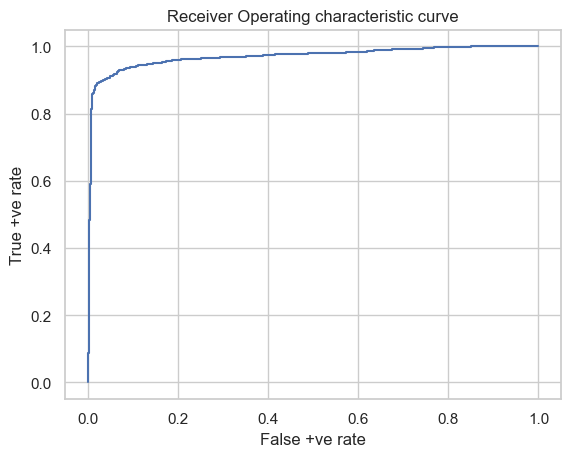

In [123]:
plt.plot(fpr,tpr)
plt.xlabel("False +ve rate")
plt.ylabel("True +ve rate")
plt.title("Receiver Operating characteristic curve")

In [124]:
tpr_index = np.argmax(tpr)
fpr[tpr_index],tpr[tpr_index],threshold[tpr_index]

(0.85, 1.0, 0.004130466016448902)

In [125]:
y_proba = lg_model.predict_proba(x_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

best_f1 = 0
best_thresh = 0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    score = f1_score(y_test, y_pred_thresh)
    if score > best_f1:
        best_f1 = score
        best_thresh = t

print("Best F1 Score:", best_f1)
print("Optimal Threshold:", best_thresh)


Best F1 Score: 0.9412915851272016
Optimal Threshold: 0.37473523820353344


In [126]:
from sklearn.metrics import precision_recall_curve

# y_true = actual values
# y_probs = predicted probabilities (e.g., model.predict_proba(X)[:, 1])
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# F1 = 2 * (P * R) / (P + R)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[f1_scores.argmax()]

print(f"Best threshold for maximum F1-score: {best_threshold:.2f}")

Best threshold for maximum F1-score: 0.37


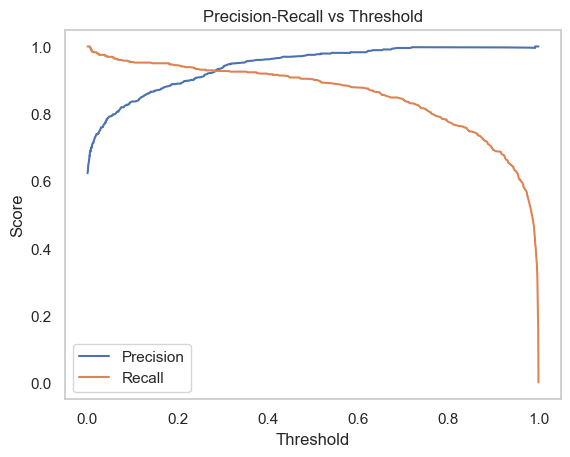

In [127]:
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()

In [128]:
y_proba = lg_model.predict_proba(x_test)[:, 1]
y_pred = (y_proba >= best_thresh).astype(int)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       315
           1       0.96      0.92      0.94       521

    accuracy                           0.93       836
   macro avg       0.92      0.93      0.92       836
weighted avg       0.93      0.93      0.93       836



In [130]:
print(confusion_matrix(y_test, y_pred))

[[295  20]
 [ 40 481]]


In [131]:
y_pred_0 = (y_pred_prob >= best_threshold).astype(int)
precision = precision_score(y_train, y_pred_0)
recall = recall_score(y_train, y_pred_0)

print(f"Precision at Best Threshold: {precision:.2f}")
print(f"Recall at Best Threshold: {recall:.2f}")


Precision at Best Threshold: 0.93
Recall at Best Threshold: 0.94


### Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1 = cross_val_score(lg_model, x, y, cv=5, scoring=make_scorer(f1_score))
print("Cross-Validated F1 Scores:", f1)
print("Average F1 Score:", f1.mean())

Cross-Validated F1 Scores: [0.79166667 0.79710145 0.77839851 0.77366997 0.8003581 ]
Average F1 Score: 0.7882389402383607


### Model Validation

In [133]:
y_train_proba = lg_model.predict_proba(x_train)[:, 1]
y_train_pred = (y_train_proba >= best_threshold).astype(int)

# Evaluate
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


[[1118  142]
 [ 118 1964]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1260
           1       0.93      0.94      0.94      2082

    accuracy                           0.92      3342
   macro avg       0.92      0.92      0.92      3342
weighted avg       0.92      0.92      0.92      3342



In [134]:
y_test_proba = lg_model.predict_proba(x_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

# Evaluate
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[295  20]
 [ 40 481]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       315
           1       0.96      0.92      0.94       521

    accuracy                           0.93       836
   macro avg       0.92      0.93      0.92       836
weighted avg       0.93      0.93      0.93       836



### Feature Importance (Model Explainability)

In [135]:
coeffs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coeffs)

                     Feature  Coefficient
6                cibil_score     4.346013
4                loan_amount     1.002470
9        luxury_assets_value     0.293925
10          bank_asset_value     0.123914
1                  education     0.115911
8    commercial_assets_value     0.095025
7   residential_assets_value     0.012349
2              self_employed     0.002654
0           no_of_dependents    -0.014714
5                  loan_term    -0.703063
3               income_annum    -1.371255


### Save the Model

In [136]:
import pickle

In [137]:
pickle.dump(lg_model,open("lg_model.pkl","wb"))

In [138]:
with open("lg_model.pkl","wb") as file:
    pickle.dump(lg_model,file)